<a href="https://colab.research.google.com/github/Ankush169/CLL788/blob/main/cll788_visualisation_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import numpy as np
import scipy.stats

In [5]:
df=pd.read_csv("diabetes.csv")


In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
print(df['Pregnancies'].mean())# it ignores the nan values
print(np.mean(df['Pregnancies'])) # if nan will be present then it will return nan
print(np.nanmean(df['Pregnancies']))
print(df['Glucose'].mean())



3.8450520833333335
3.8450520833333335
3.8450520833333335
120.89453125


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
x=statistics.median(df['Pregnancies'])
x

3.0

In [32]:
columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for i in range(len(columns)):
  print(df[columns[i]].corr(df["Outcome"]))

0.22189815303398613
0.46658139830687295
0.0650683595503327
0.0747522319183194
0.13054795488404794
0.29269466264444494
0.1738440656529596
0.23835598302719754


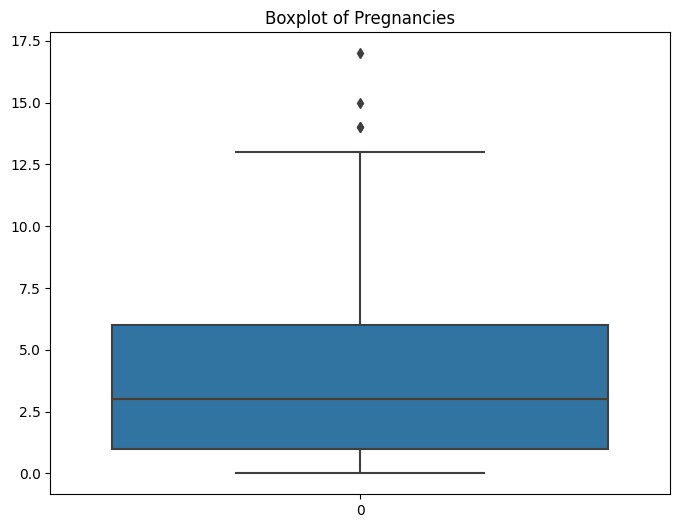

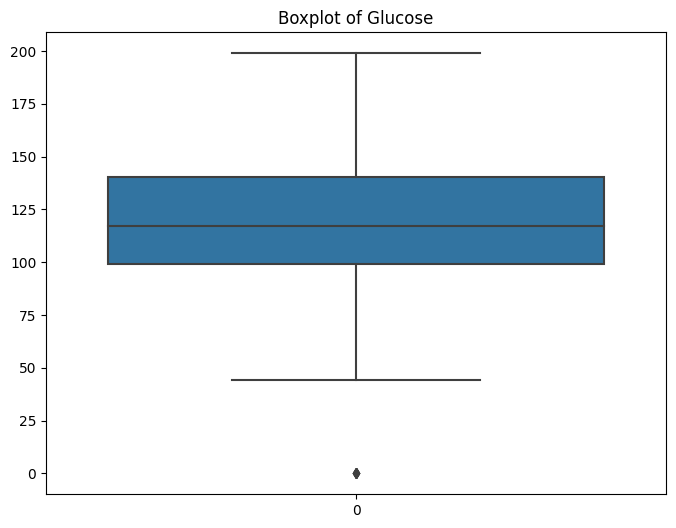

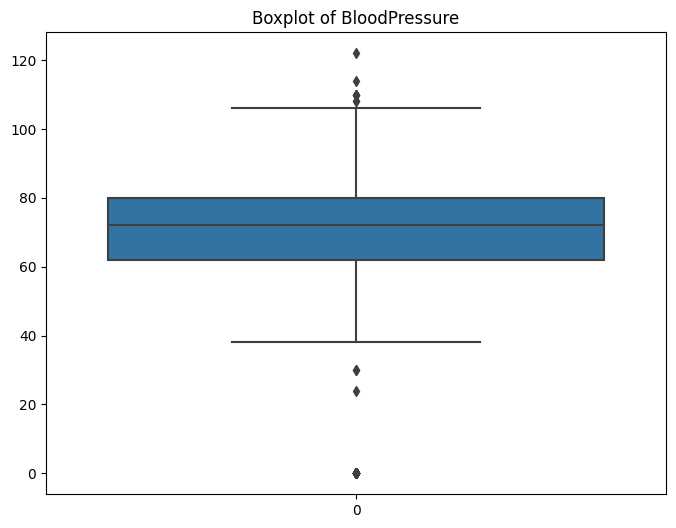

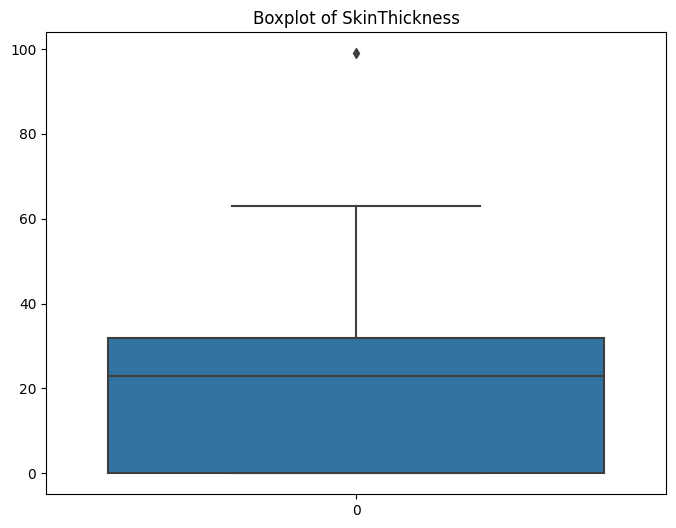

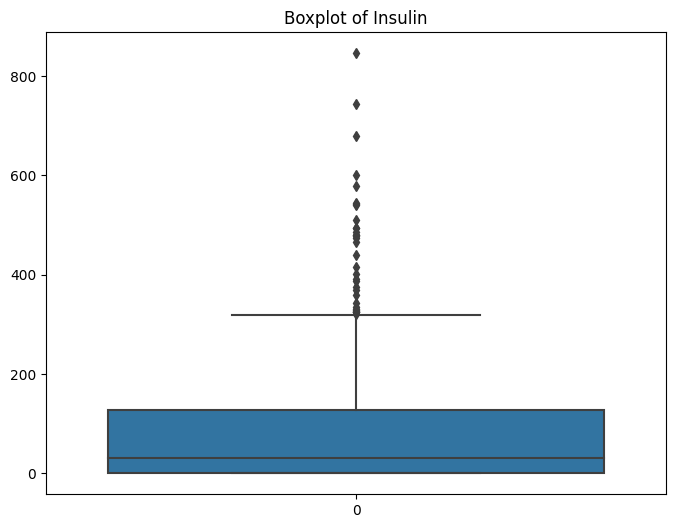

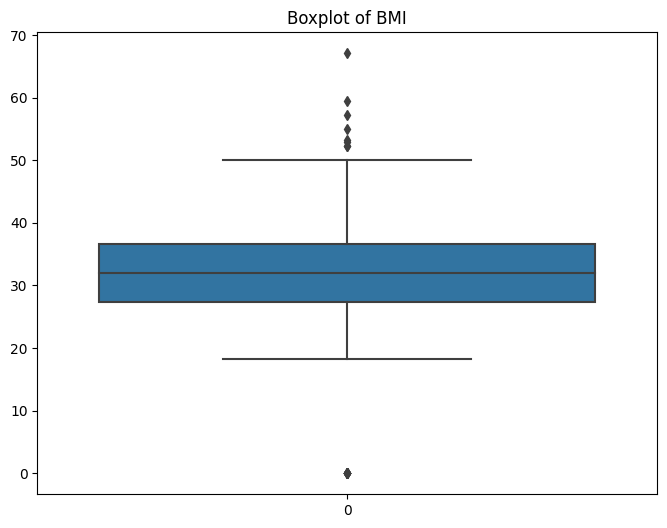

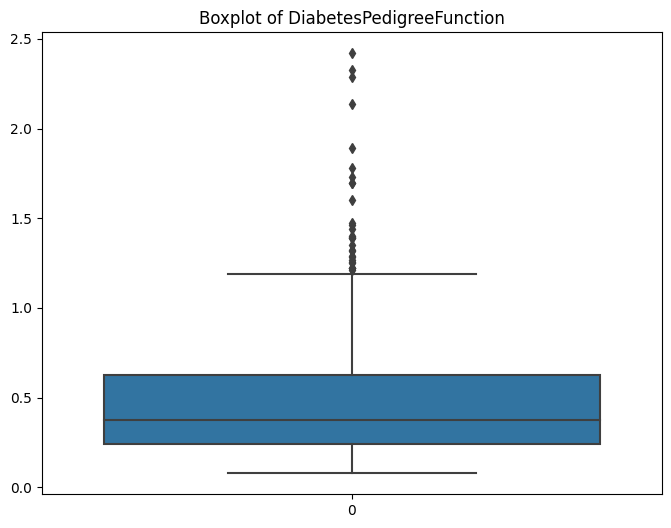

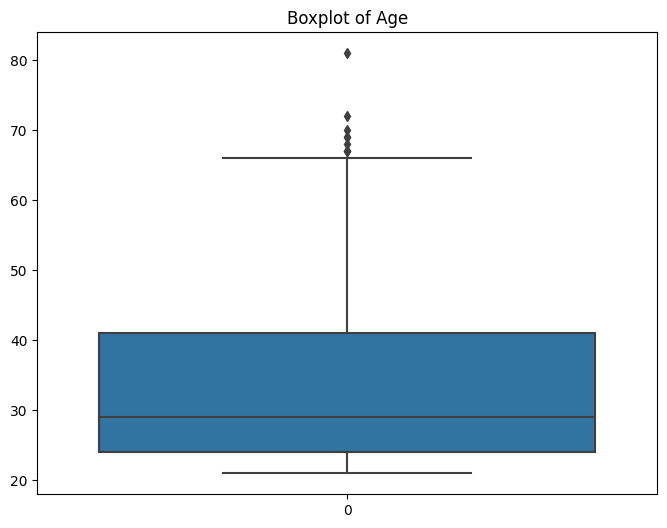

In [37]:
for i in range(len(columns)):
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[columns[i]])
  plt.title(f'Boxplot of {columns[i]}')
  plt.show()

In [46]:
IQR=[]
for i in range(len(columns)):
  Q1=df[columns[i]].quantile(0.25)
  Q3=df[columns[i]].quantile(0.75)
  IQ=Q3-Q1
  IQR.append(IQ)
print(IQR)

[5.0, 41.25, 18.0, 32.0, 127.25, 9.3, 0.38249999999999995, 17.0]


In [47]:
LB=[]
UB=[]
for i in range(len(IQR)):
  lower_bound = Q1 - 1.5 * IQR[i]
  upper_bound = Q3 + 1.5 * IQR[i]
  LB.append(lower_bound)
  UB.append(upper_bound)
print(LB)
print(UB)

[16.5, -37.875, -3.0, -24.0, -166.875, 10.049999999999999, 23.42625, -1.5]
[48.5, 102.875, 68.0, 89.0, 231.875, 54.95, 41.57375, 66.5]


In [49]:
empty_df = []
for i in range(len(columns)):
  df_filtedred = df[(df[columns[i]] >= LB[i]) & (df[columns[i]] <= UB[i])]
  empty_df.append(df_filtedred)



ValueError: Cannot set a DataFrame with multiple columns to the single column Pregnancies

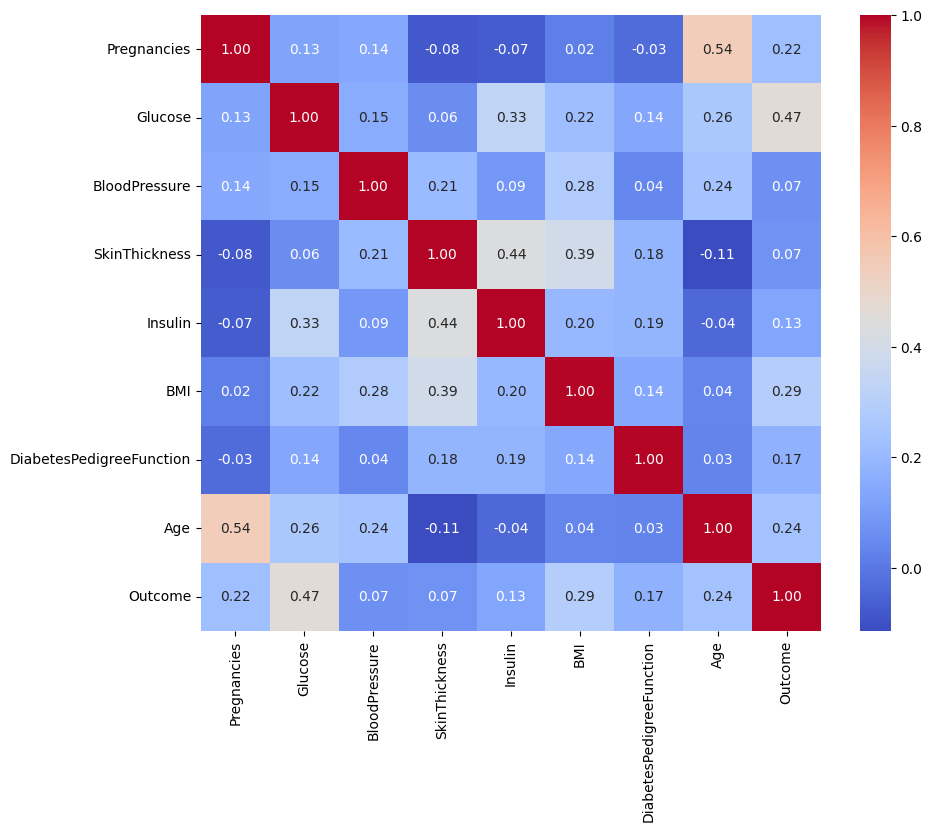

In [50]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()